## 如何快速部署&微调VisualGLM,支持GPU&CPU部署
- 项目地址

https://github.com/THUDM/VisualGLM-6B.git

- 介绍

VisualGLM-6B 是一个开源的，支持**图像、中文和英文**的多模态对话语言模型，语言模型基于 [ChatGLM-6B](https://github.com/THUDM/ChatGLM-6B)，具有 62 亿参数；图像部分通过训练 [BLIP2-Qformer](https://arxiv.org/abs/2301.12597) 构建起视觉模型与语言模型的桥梁，整体模型共78亿参数。

VisualGLM-6B 依靠来自于 [CogView](https://arxiv.org/abs/2105.13290) 数据集的30M高质量中文图文对，与300M经过筛选的英文图文对进行预训练，中英文权重相同。该训练方式较好地将视觉信息对齐到ChatGLM的语义空间；之后的微调阶段，模型在长视觉问答数据上训练，以生成符合人类偏好的答案。

VisualGLM-6B 由 [SwissArmyTransformer](https://github.com/THUDM/SwissArmyTransformer)(简称`sat`) 库训练，这是一个支持Transformer灵活修改、训练的工具库，支持Lora、P-tuning等参数高效微调方法。本项目提供了符合用户习惯的huggingface接口，也提供了基于sat的接口。

不过，由于 VisualGLM-6B 仍处于v1版本，目前已知其具有相当多的**[局限性](https://github.com/THUDM/VisualGLM-6B#%E5%B1%80%E9%99%90%E6%80%A7)**，如图像描述事实性/模型幻觉问题，图像细节信息捕捉不足，以及一些来自语言模型的局限性。请大家在使用前了解这些问题，评估可能存在的风险。在VisualGLM之后的版本中，将会着力对此类问题进行优化。

结合模型量化技术，用户可以在消费级的显卡上进行本地部署（INT4量化级别下最低只需8.7G显存）。

## 环境要求

- GPU:内存>16G

- CPU:CPU>i7,内存>32G 

## 效果
VisualGLM-6B 可以进行图像的描述的相关知识的问答。

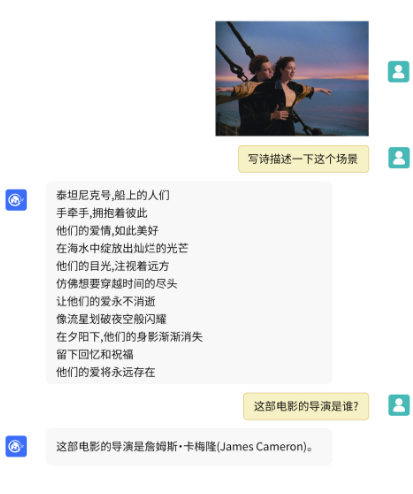

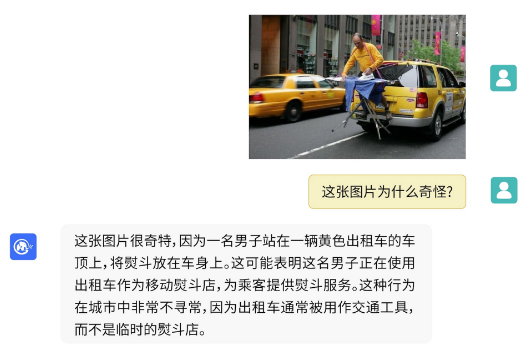

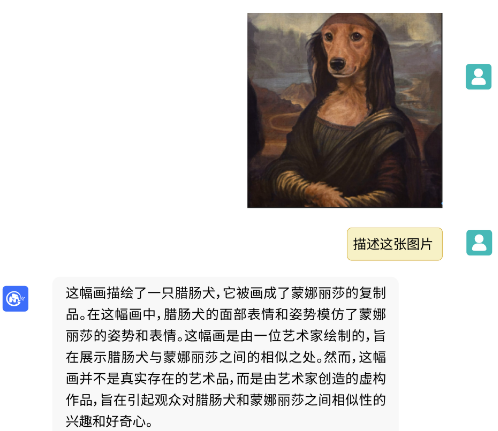


## 部署
- 安装依赖

google colab :https://colab.research.google.com/drive/1njiRxJVC3iHvY64FFqA28qTxLtfLZ87d#scrollTo=Q_Uy_fMYY0aF

In [ ]:
!git clone https://github.com/THUDM/VisualGLM-6B.git

cd VisualGLM-6B/

!pip install -i https://pypi.org/simple -r requirements.txt

- 启动推理(量化模型）

In [ ]:
!python web_demo_hf.py --quant 4

线上效果：

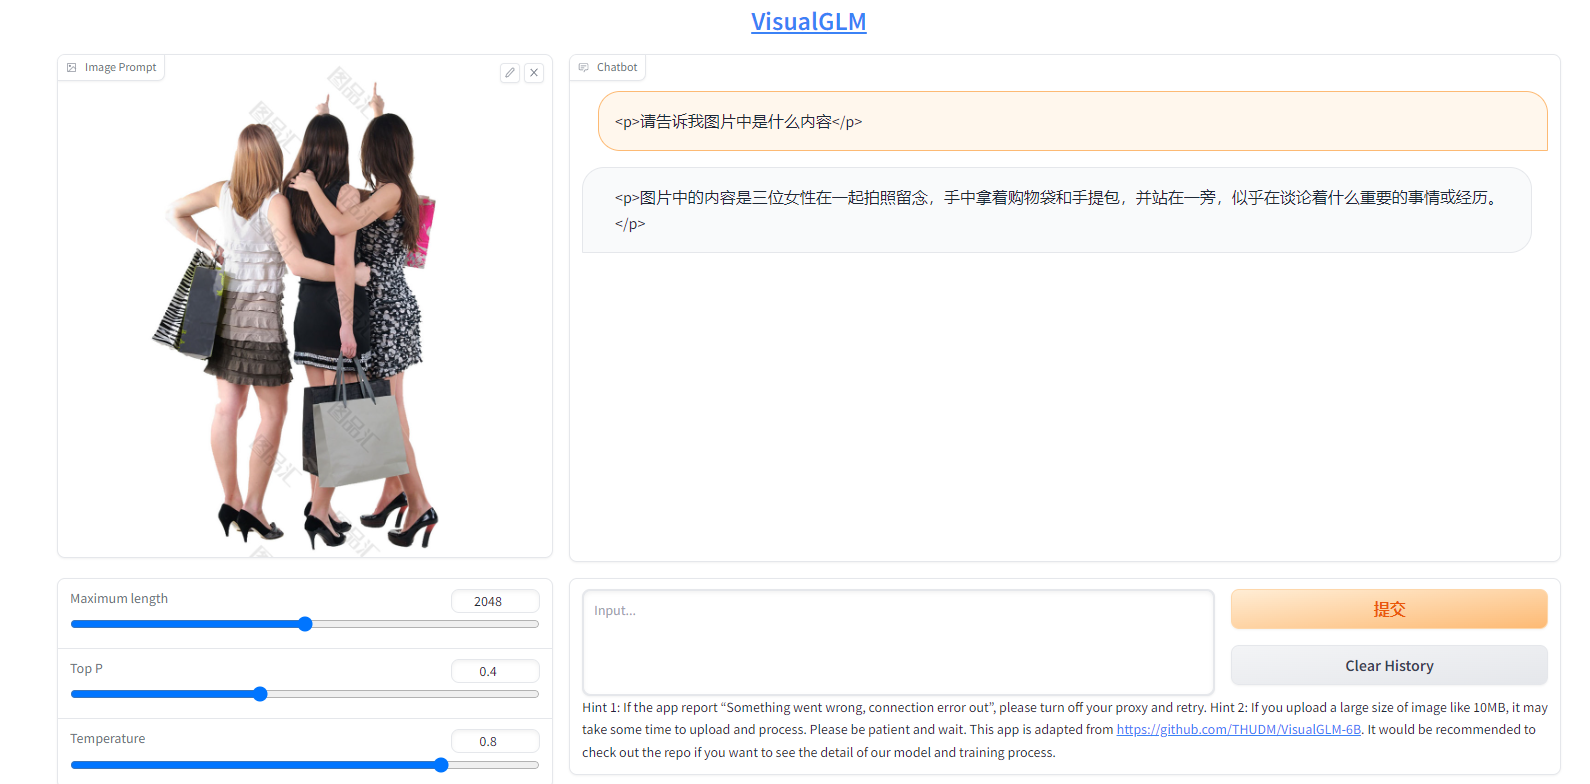

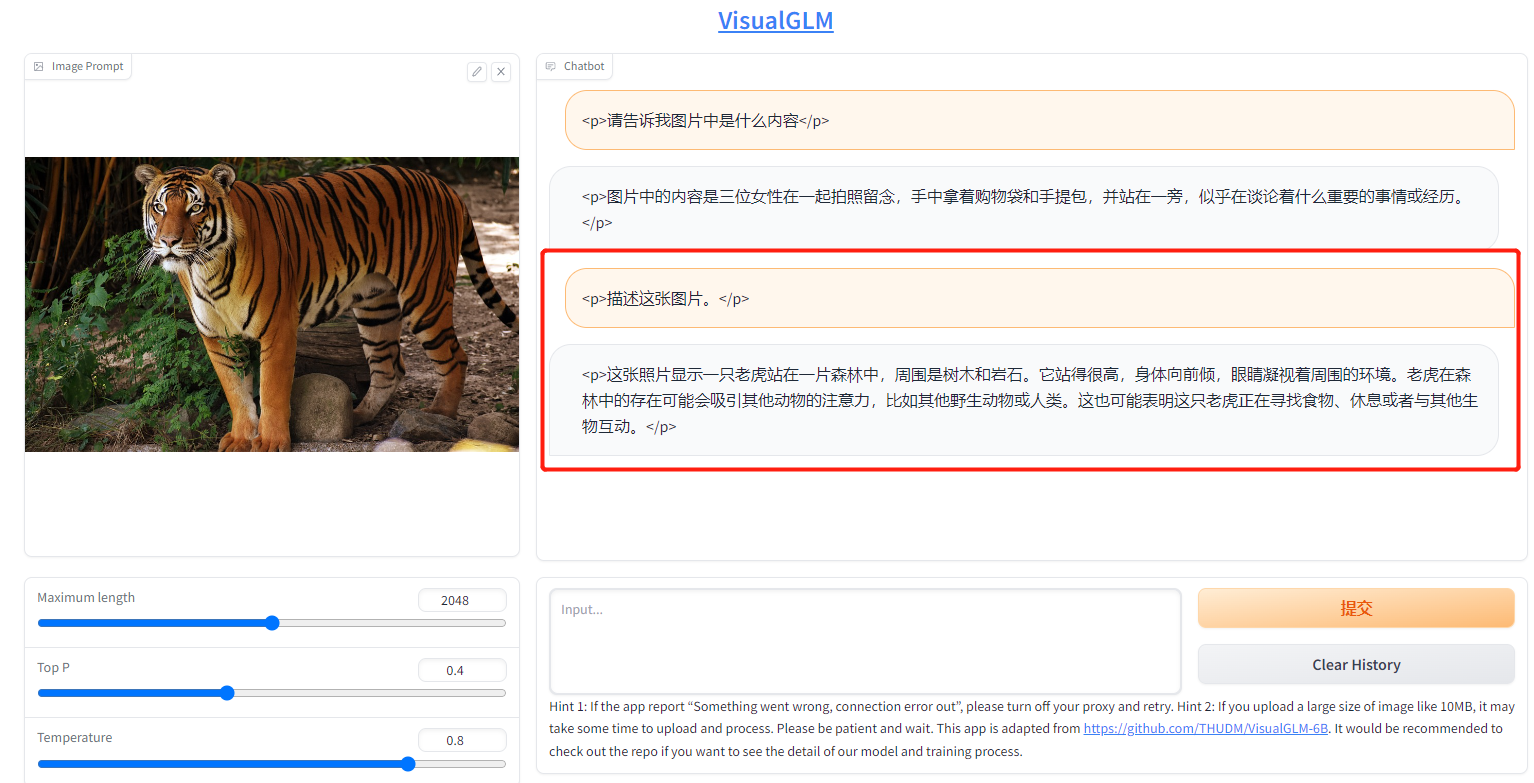

## 模型微调
提供了一个小样本微调的例子，使用20张标注图增强模型回答“背景”问题的能力。

- 解压fewshot-data.zip
- fine-tuning

In [ ]:
cd ..
!unzip fewshot-data.zip

- 微调数据结构

样本结构：
```python
{
    "image": self.images[idx],
    "input_ids": self.input_ids[idx],
    "labels": self.labels[idx],
    "pre_image": self.pre_image
}
```

In [ ]:
#微调：
# 1、ptuning bash finetune/finetune_visualglm.sh --user_ptuing true
# 2、lora    bash finetune/finetune_visualglm.sh --use_lora true

bash finetune/finetune_visualglm.sh

- 推理

In [ ]:
python cli_demo.py --from_pretrained your_checkpoint_path --prompt_zh 这张图片的背景里有什么内容？